In [240]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import json
import gmaps
import requests
from config import gkey

In [104]:
test_file='resources/Homeless_311.csv'
test_file_df= pd.read_csv(test_file, encoding="ISO-8859-1")

/Users/Victoria/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6,17,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [195]:
test_file_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Year,Month,month
0,27059714,01/05/2014 06:51:03 PM,01/05/2014 08:02:22 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10011.0,175 WEST 12 STREET,...,NaN,NaN,NaN,NaN,40.736853,-73.999726,"(40.73685299671948, -73.99972575804958)",2014,1,1
1,27059781,01/05/2014 10:23:29 PM,01/05/2014 11:06:53 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011.0,33 7 AVENUE,...,NaN,NaN,NaN,NaN,40.737619,-74.000350,"(40.737618782500256, -74.00035002335429)",2014,1,1
2,27062187,01/05/2014 01:24:35 PM,01/05/2014 02:27:21 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Store/Commercial,10065.0,58 EAST 66 STREET,...,NaN,NaN,NaN,NaN,40.767683,-73.967563,"(40.76768291601528, -73.96756309694287)",2014,1,1
3,27063414,01/05/2014 08:33:11 AM,01/05/2014 09:06:40 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10029.0,307 EAST 111 STREET,...,NaN,NaN,NaN,NaN,40.793651,-73.939684,"(40.79365061880486, -73.93968391140241)",2014,1,1
4,27064630,01/05/2014 10:22:03 AM,01/05/2014 10:22:53 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10026.0,242 WEST 114TH STREET,...,NaN,NaN,NaN,NaN,40.802633,-73.955796,"(40.80263318509567, -73.95579618732891)",2014,1,1


In [232]:
year_group = test_file_df.groupby('Created Date')
count_year = year_group['Unique Key'].count()
#count_year

In [107]:
pd.to_datetime(test_file_df['Created Date']).apply(lambda datetime:datetime.year)

0         2014
1         2014
2         2014
3         2014
4         2014
5         2014
6         2014
7         2017
8         2017
9         2014
10        2014
11        2014
12        2014
13        2014
14        2017
15        2014
16        2014
17        2014
18        2014
19        2014
20        2014
21        2014
22        2014
23        2014
24        2014
25        2014
26        2014
27        2014
28        2014
29        2019
          ... 
154750    2013
154751    2013
154752    2013
154753    2017
154754    2017
154755    2017
154756    2017
154757    2017
154758    2013
154759    2013
154760    2013
154761    2013
154762    2013
154763    2013
154764    2013
154765    2013
154766    2013
154767    2013
154768    2013
154769    2013
154770    2013
154771    2014
154772    2014
154773    2014
154774    2014
154775    2014
154776    2014
154777    2014
154778    2014
154779    2014
Name: Created Date, Length: 154780, dtype: int64

In [108]:
test_file_df['Year'] = pd.to_datetime(test_file_df['Created Date']).apply(lambda datetime:datetime.year)
test_file_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Year
0,27059714,01/05/2014 06:51:03 PM,01/05/2014 08:02:22 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10011.0,175 WEST 12 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.736853,-73.999726,"(40.73685299671948, -73.99972575804958)",2014
1,27059781,01/05/2014 10:23:29 PM,01/05/2014 11:06:53 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011.0,33 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.737619,-74.000350,"(40.737618782500256, -74.00035002335429)",2014
2,27062187,01/05/2014 01:24:35 PM,01/05/2014 02:27:21 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Store/Commercial,10065.0,58 EAST 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767683,-73.967563,"(40.76768291601528, -73.96756309694287)",2014
3,27063414,01/05/2014 08:33:11 AM,01/05/2014 09:06:40 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10029.0,307 EAST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.793651,-73.939684,"(40.79365061880486, -73.93968391140241)",2014
4,27064630,01/05/2014 10:22:03 AM,01/05/2014 10:22:53 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10026.0,242 WEST 114TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.802633,-73.955796,"(40.80263318509567, -73.95579618732891)",2014


In [109]:
test_file_df['Month'] = pd.to_datetime(test_file_df['Created Date']).apply(lambda datetime:datetime.month)
test_file_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Year,Month
0,27059714,01/05/2014 06:51:03 PM,01/05/2014 08:02:22 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10011.0,175 WEST 12 STREET,...,NaN,NaN,NaN,NaN,NaN,40.736853,-73.999726,"(40.73685299671948, -73.99972575804958)",2014,1
1,27059781,01/05/2014 10:23:29 PM,01/05/2014 11:06:53 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011.0,33 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.737619,-74.000350,"(40.737618782500256, -74.00035002335429)",2014,1
2,27062187,01/05/2014 01:24:35 PM,01/05/2014 02:27:21 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Store/Commercial,10065.0,58 EAST 66 STREET,...,NaN,NaN,NaN,NaN,NaN,40.767683,-73.967563,"(40.76768291601528, -73.96756309694287)",2014,1
3,27063414,01/05/2014 08:33:11 AM,01/05/2014 09:06:40 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10029.0,307 EAST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,40.793651,-73.939684,"(40.79365061880486, -73.93968391140241)",2014,1
4,27064630,01/05/2014 10:22:03 AM,01/05/2014 10:22:53 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10026.0,242 WEST 114TH STREET,...,NaN,NaN,NaN,NaN,NaN,40.802633,-73.955796,"(40.80263318509567, -73.95579618732891)",2014,1


In [110]:
new_data_frame = test_file_df[['Unique Key','Incident Zip', 'Year','Month']]
new_data_frame.head()

,Unique Key,Incident Zip,Year,Month
0,27059714,10011.0,2014,1
1,27059781,10011.0,2014,1
2,27062187,10065.0,2014,1
3,27063414,10029.0,2014,1
4,27064630,10026.0,2014,1


In [111]:
year_group = new_data_frame.groupby('Year')

count_year = year_group['Unique Key'].count()

count_year

Year
2010     1787
2011     1839
2012     2186
2013     2932
2014     4912
2015    11384
2016    50783
2017    28324
2018    24435
2019    26198
Name: Unique Key, dtype: int64

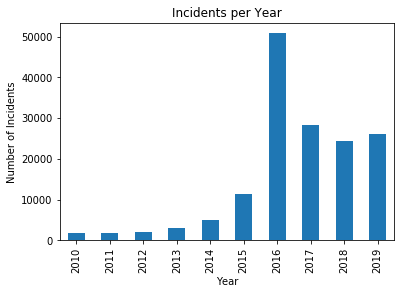

<Figure size 432x288 with 0 Axes>

In [133]:
count_chart = count_year.plot(kind='bar')

count_chart.set_xlabel("Year")
count_chart.set_ylabel("Number of Incidents")

count_chart.set_title('Incidents per Year')
plt.show()
plt.tight_layout()

In [113]:
test_file_df['month'] = pd.to_datetime(test_file_df['Created Date']).apply(lambda datetime:datetime.month)
test_file_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Year,Month,month
0,27059714,01/05/2014 06:51:03 PM,01/05/2014 08:02:22 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Residential Building/House,10011.0,175 WEST 12 STREET,...,NaN,NaN,NaN,NaN,40.736853,-73.999726,"(40.73685299671948, -73.99972575804958)",2014,1,1
1,27059781,01/05/2014 10:23:29 PM,01/05/2014 11:06:53 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10011.0,33 7 AVENUE,...,NaN,NaN,NaN,NaN,40.737619,-74.000350,"(40.737618782500256, -74.00035002335429)",2014,1,1
2,27062187,01/05/2014 01:24:35 PM,01/05/2014 02:27:21 PM,NYPD,New York City Police Department,Homeless Encampment,NaN,Store/Commercial,10065.0,58 EAST 66 STREET,...,NaN,NaN,NaN,NaN,40.767683,-73.967563,"(40.76768291601528, -73.96756309694287)",2014,1,1
3,27063414,01/05/2014 08:33:11 AM,01/05/2014 09:06:40 AM,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10029.0,307 EAST 111 STREET,...,NaN,NaN,NaN,NaN,40.793651,-73.939684,"(40.79365061880486, -73.93968391140241)",2014,1,1
4,27064630,01/05/2014 10:22:03 AM,01/05/2014 10:22:53 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,Status Call,NaN,10026.0,242 WEST 114TH STREET,...,NaN,NaN,NaN,NaN,40.802633,-73.955796,"(40.80263318509567, -73.95579618732891)",2014,1,1


In [233]:
month_group = new_data_frame.groupby('Month')
count_month = month_group['Unique Key'].count()
count_month

Month
1      7588
2      5560
3      8604
4     12212
5     13920
6     15442
7     17530
8     19585
9     18604
10    16225
11    11656
12     7854
Name: Unique Key, dtype: int64

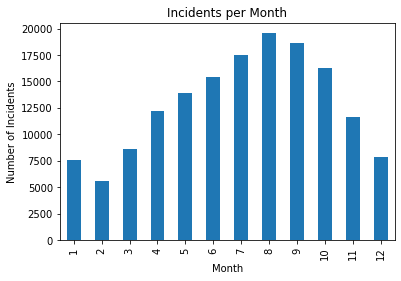

<Figure size 432x288 with 0 Axes>

In [137]:
count_month_chart = count_month.plot(kind='bar')

count_month_chart.set_xlabel("Month")
count_month_chart.set_ylabel("Number of Incidents")

count_month_chart.set_title('Incidents per Month')
plt.show()
plt.tight_layout()

In [116]:
new_data_frame.head()

,Unique Key,Incident Zip,Year,Month
0,27059714,10011.0,2014,1
1,27059781,10011.0,2014,1
2,27062187,10065.0,2014,1
3,27063414,10029.0,2014,1
4,27064630,10026.0,2014,1


In [152]:
month_year=new_data_frame.groupby(['Year', 'Month']).count()
month_year.head()

Unique Key  Incident Zip
Year Month                          
2010 1              66            66
     2              55            55
     3             115           115
     4             135           135
     5             165           165

In [212]:
data2010=month_year.loc[2010]['Unique Key']
data2011=month_year.loc[2011]['Unique Key']
data2012=month_year.loc[2012]['Unique Key']
data2013=month_year.loc[2013]['Unique Key']
data2014=month_year.loc[2014]['Unique Key']
data2015=month_year.loc[2015]['Unique Key']
data2016=month_year.loc[2016]['Unique Key']
data2017=month_year.loc[2017]['Unique Key']
data2018=month_year.loc[2018]['Unique Key']
data2019=month_year.loc[2019]['Unique Key']

In [182]:
df=pd.DataFrame({'2010': data2010, '2011': data2011,'2012': data2012, '2013': data2013, '2014': data2014, '2015': data2015, 
                 '2016': data2016, '2017': data2017, '2018': data2018, '2019': data2019
                })
df.head()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,
1,66,79,91,127,213,386,1552,2038,1834,1202
2,55,62,83,103,143,358,1190,1728,980,858
3,115,115,109,79,194,463,3925,1744,909,951
4,135,138,137,153,217,591,4330,3285,1541,1685
5,165,151,165,211,348,854,5070,2451,2404,2101


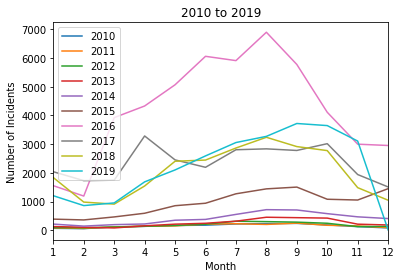

<Figure size 432x288 with 0 Axes>

In [259]:
compared_data=df.plot()

compared_data.set_xlabel("Month")
compared_data.set_ylabel("Number of Incidents")
compared_data.set_title('2010 to 2019')
compared_data.xaxis.set_ticks(np.arange(1, 13, 1))

plt.show()
plt.tight_layout()


In [ ]:
data2011=month_year.loc[2011]['Unique Key']
data2012=month_year.loc[2012]['Unique Key']
data2013=month_year.loc[2013]['Unique Key']
data2014=month_year.loc[2014]['Unique Key']
data2015=month_year.loc[2015]['Unique Key']
data2016=month_year.loc[2016]['Unique Key']
data2017=month_year.loc[2017]['Unique Key']
data2018=month_year.loc[2018]['Unique Key']
data2019=month_year.loc[2019]['Unique Key']



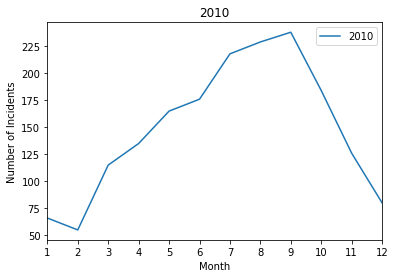

<Figure size 432x288 with 0 Axes>

In [256]:
graph_data2010=pd.DataFrame({'2010': data2010})
graph_data2010.head()
graph2010=graph_data2010.plot(kind='line')
graph2010.set_xlabel("Month")
graph2010.set_ylabel("Number of Incidents")
graph2010.set_title('2010')
#graph2010.set(xlim=(0, 12), ylim=(50, 250))
graph2010.xaxis.set_ticks(np.arange(1, 13, 1))

plt.show()
plt.tight_layout()







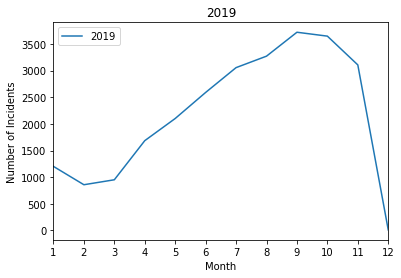

<Figure size 432x288 with 0 Axes>

In [257]:
graph_data2019=pd.DataFrame({'2019': data2019})
graph_data2019.head()
graph2019=graph_data2019.plot()
graph2019.set_xlabel("Month")
graph2019.set_ylabel("Number of Incidents")
graph2019.set_title('2019')
graph2019.xaxis.set_ticks(np.arange(1, 13, 1))

plt.show()
plt.tight_layout()

In [234]:
complaint_type = test_file_df.groupby('Complaint Type')
complaint_count = complaint_type['Unique Key'].count()
complaint_count

Complaint Type
Homeless Encampment            37369
Homeless Person Assistance    117411
Name: Unique Key, dtype: int64

([<matplotlib.patches.Wedge at 0x121ac4f60>,
 [Text(-1.1978152144185312, -0.07237894795786932, 'Homeless Encampment'),
  Text(1.0979972860955378, 0.06634726615945527, 'Homeless Person Assistance')],
 [Text(-0.6987255417441433, -0.042221052975423765, '24.1%'),
  Text(0.598907610597566, 0.036189417905157416, '75.9%')])

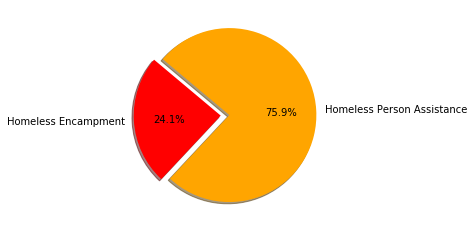

In [199]:
labels=['Homeless Encampment', 'Homeless Person Assistance']
sizes=[37369, 117411]
colors=['red', 'orange']
explode=(0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [235]:
location_type = test_file_df.groupby('Location Type')
location_count = location_type['Unique Key'].count()
location_count

Location Type
Bridge                           78
Bridge/Underpass               1947
Highway                         503
House of Worship               2280
Other                          8432
Park/Playground               10616
Residential Building/House    14734
Roadway Tunnel                   18
Store/Commercial              21856
Street/Sidewalk               68128
Subway                          379
Name: Unique Key, dtype: int64

In [226]:
location_count_modified = pd.Series({'Other':13637,'Park/Playground':10616, 
                                     'Residential Building/House':14734, 'Store/Commercial':21856, 'Street/Sidewalk':68128,})

([<matplotlib.patches.Wedge at 0x118637b00>,
 [Text(-1.02716294504695, 0.3936194663916872, 'Other'),
  Text(-1.0723158866375424, -0.2452318072044112, 'Park/Playground'),
  Text(-0.7323022076454477, -0.8208126928097566, 'Residential Building/House'),
  Text(0.1783135623203317, -1.0854511842974024, 'Store/Commercial'),
  Text(0.8497668461798386, 0.8472876177152423, 'Street/Sidewalk')])

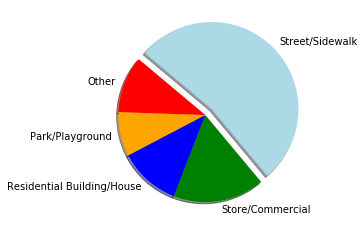

In [230]:
labels=['Other','Park/Playground', 
        'Residential Building/House', 'Store/Commercial', 'Street/Sidewalk' ]
sizes=[13637, 10616, 14734,21856,68128]
colors=['red', 'orange', 'blue', 'green','lightblue']
explode=(0,0,0,0,0.1)

plt.pie(sizes, explode=explode, labels=labels,colors=colors,
     shadow=True, startangle=140)

In [243]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Configure gmaps with API key
gmaps.configure(api_key=gkey)

# Store 'Lat' and 'Lng' into  locations 
locations = test_file_df[["Latitude", "Longitude"]]

locations = locations.dropna()

type(locations)

locations.head()

,Latitude,Longitude
0,40.736853,-73.999726
1,40.737619,-74.000350
2,40.767683,-73.967563
3,40.793651,-73.939684
4,40.802633,-73.955796


In [246]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = True
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))